## Intensity transformations

### Display original image

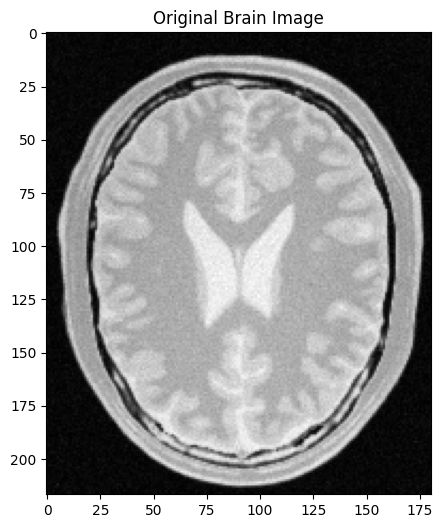

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
image_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\brain_proton_density_slice.png'  # Update path to your image file
brain_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert brain_image is not None, "Image not found."

# Original image with axis
plt.figure(figsize=(6, 6))

plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('on')  # Show axes
plt.show()

### What are `Gray` and `White` matters

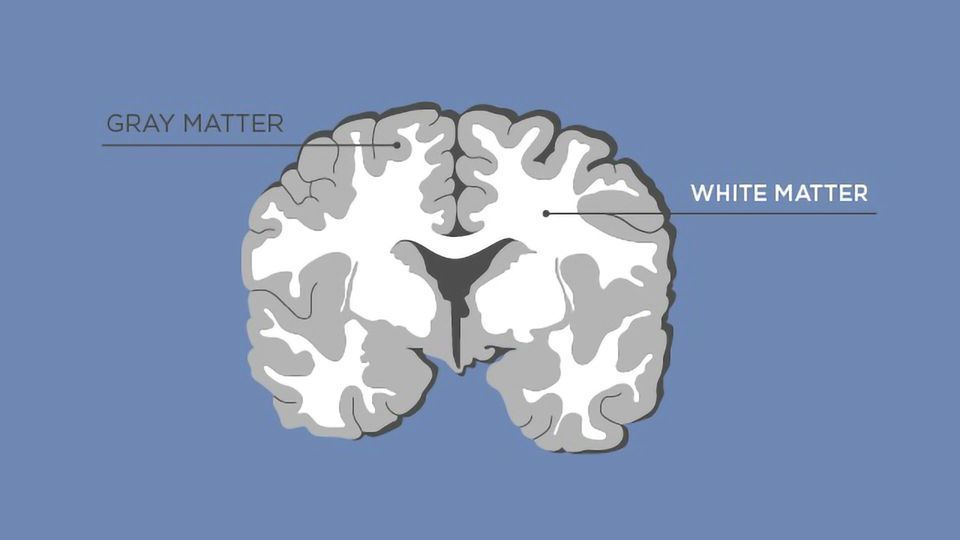

### Get intensity values of `Gray` and `White` matters

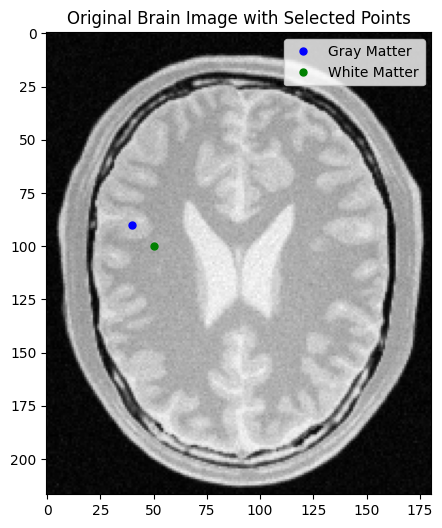

Gray matter pixel value: 190
White matter pixel value: 173


In [14]:
gray_matter_point = (90, 40)
white_matter_point = (100, 50)

# Display the original image with the selected points
plt.figure(figsize=(6, 6))
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image with Selected Points')
plt.plot(gray_matter_point[1], gray_matter_point[0], 'bo', markersize=5, label='Gray Matter')  # Blue circle for gray matter
plt.plot(white_matter_point[1], white_matter_point[0], 'go', markersize=5, label='White Matter')  # Green circle for white matter
plt.axis('on')  # Show axes
plt.legend()
plt.show()

# Print the pixel values at the selected points
gray_matter_value = brain_image[gray_matter_point]
white_matter_value = brain_image[white_matter_point]
print(f"Gray matter pixel value: {gray_matter_value}")
print(f"White matter pixel value: {white_matter_value}")

- selected white matters pixel intensity range: 120 - 175
- selected gray matters pixel intensity range: 180 - 240

## For `White` matter

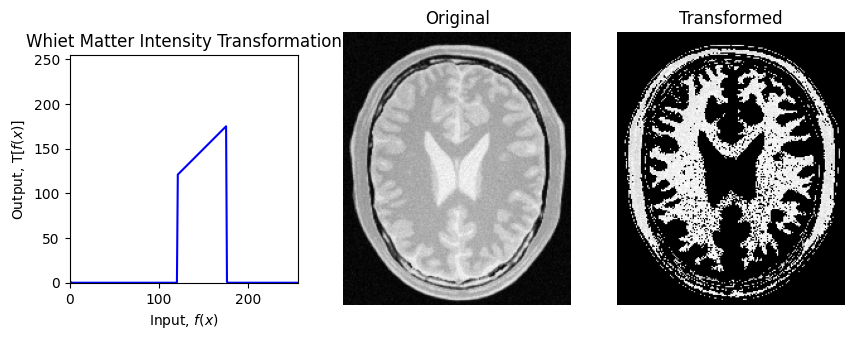

In [15]:
f = brain_image

# Control points
c = np.array([(0, 0), (120, 0), (120, 120), (175, 175), (175, 0), (255, 0)])

# Compute the piecewise linear intensity transformation based on the control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')  # from 0 to c[0]
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # from c[0] to c[1]
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  # from c[1] to c[2]
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  # from c[2] to c[3]
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')  # from c[3] to c[4]
t6 = np.linspace(c[4, 1] + 1, c[5, 1], 255 - c[4, 0]).astype('uint8')  # from c[4] to c[5]

# Concatenate the piecewise linear transformation parts
t = np.concatenate((t1, t2), axis=0).astype('uint8')
t = np.concatenate((t, t3), axis=0).astype('uint8')
t = np.concatenate((t, t4), axis=0).astype('uint8')
t = np.concatenate((t, t5), axis=0).astype('uint8')
t = np.concatenate((t, t6), axis=0).astype('uint8')

# Apply the piecewise linear transformation
g = cv.LUT(f, t)

f_white_matter = g

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'b', label='Transformation')
ax[0].set_xlabel(r'Input, $f(x)$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(x)]$')
ax[0].set_title('Whiet Matter Intensity Transformation')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_aspect('equal')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

## For `Gray` matter

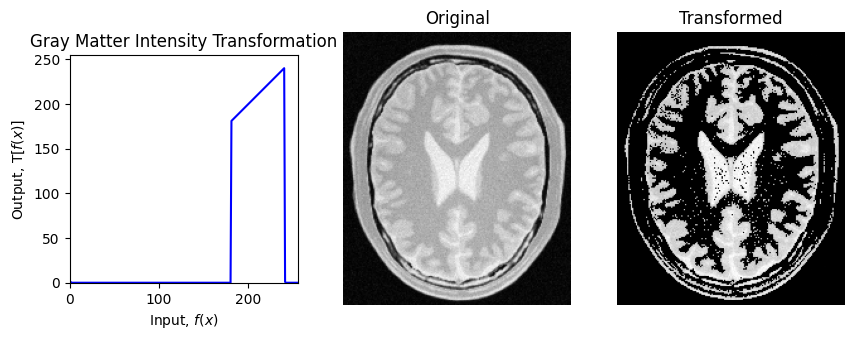

In [16]:
f = brain_image

# Control points
c = np.array([(0, 0), (180, 0), (180, 180), (240, 240), (240, 0), (255, 0)])

# Compute the piecewise linear intensity transformation based on the control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')  # from 0 to c[0]
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # from c[0] to c[1]
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  # from c[1] to c[2]
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  # from c[2] to c[3]
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')  # from c[3] to c[4]
t6 = np.linspace(c[4, 1] + 1, c[5, 1], 255 - c[4, 0]).astype('uint8')  # from c[4] to c[5]

# Concatenate the piecewise linear transformation parts
t = np.concatenate((t1, t2), axis=0).astype('uint8')
t = np.concatenate((t, t3), axis=0).astype('uint8')
t = np.concatenate((t, t4), axis=0).astype('uint8')
t = np.concatenate((t, t5), axis=0).astype('uint8')
t = np.concatenate((t, t6), axis=0).astype('uint8')

# Apply the piecewise linear transformation
g = cv.LUT(f, t)

f_gray_matter = g

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'b', label='Transformation')
ax[0].set_xlabel(r'Input, $f(x)$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(x)]$')
ax[0].set_title('Gray Matter Intensity Transformation')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_aspect('equal')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

## Comparisn

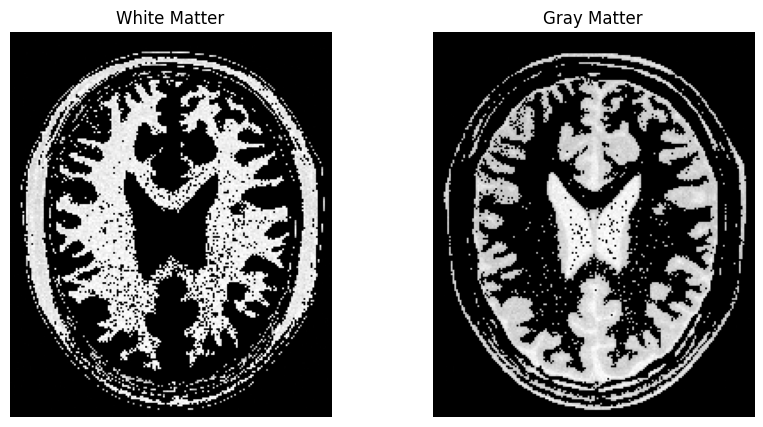

In [17]:
# Disply original and transformed images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f_white_matter, cmap='gray')
ax[0].set_title('White Matter')
ax[0].axis('off')
ax[1].imshow(f_gray_matter, cmap='gray')
ax[1].set_title('Gray Matter')
ax[1].axis('off')
plt.show()